# Dynamic Programming(동적 계획) 알고리즘
- 문제를 작은 것(부분 문제)부터 푼다는 점이 분할정복 알고리즘과 비슷함
- 그리디 알고리즘과 같이 최적화 문제를 해결하는 방법

> **동적 계획 알고리즘은 최적 부분 구조(Optimal Substructure)를 지닌 중복된 하위 문제들(Overlapping Subproblems)을 분할 정복으로 풀이하는 문제해결 패러다임**

## 가장 긴 증가 순서
- 숫자가 일렬로 나열되었을 때 가장 긴 증가 순서 찾기
- 증가 순서는 숫자들이 이웃해야만 하는 것이 아니고
- 나열된 숫자 중 증가순서를 이루지 않는 숫자를 지우면 됨  
(예) [5,2,8,6,4,6,1,9,3] 에서 증가순서를 만들어 보면
 : [5,8,9], [5,6,9], [2,8,9], [2,6,9], [2,4,6,9] 등이 된다.


### 생각해보기
[1] 모든 숫자의 조합으로 증가 순서 만들어 보기  
[2] 나누어 해결하기  
[3] 욕심내어 풀어보기  
[4] 그래프로 바꾸어 생각하기

### 그래프로 바꾸어 생각해 보자
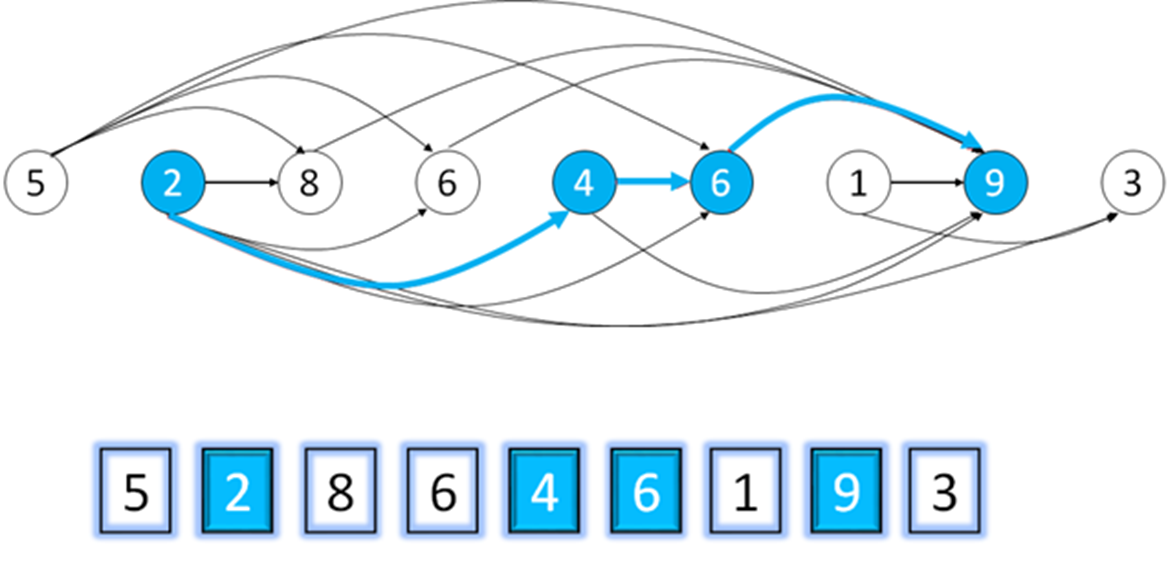

- 그래프에는 사이클이 없고 어느 간선이라도 그 방향이 항상 좌에서 우로 향한다.
-  가장 왼쪽 점부터 좌에서 우로 하나씩 각 점에 도달하는 최장 경로를 찾는다.

### 가장 긴 경로의 길이를 알아내는 알고리즘
1. 주어진 숫자들을 가지고 그래프를 만든다.
2. 가장 왼쪽 정점부터 차례로...
> 각 정점으로 들어오는 간선의 왼쪽 끝 정점까지 계산된 경로의 길이들 중에서 가장 긴 것에 1을 더하여 경로의 길이를 계산

3. 각 점의 경로 길이 중에서 가장 긴 것을 리턴한다.



### 가장 긴 경로에는 어떤 숫자가?
- 각 점에서 경로 길이가 결정될 때 경로상의 직전 점을 기록한다.
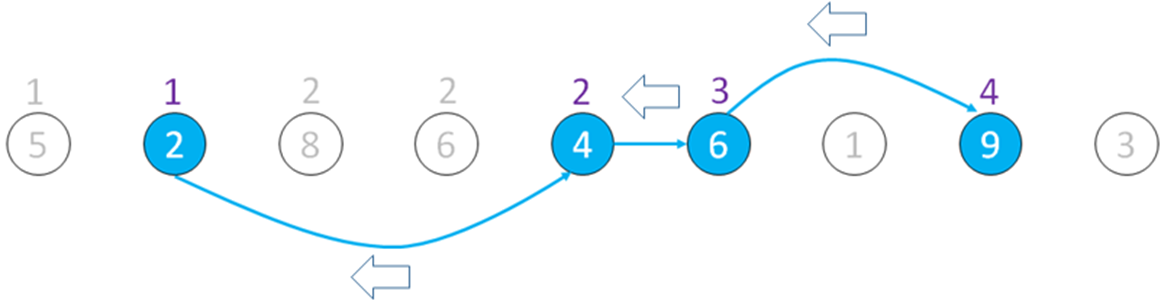

In [1]:
# 주어진 숫자들을 가지고 그래프(들어오는 간선리스트)를 만든다.
def makeAdjList(s):
    result = []
    for i in range(len(s)):
        al = []
        if i>0:
            for j in range(i):
                if s[i] > s[j]:
                    al.append(j)
        result.append(al)
    return result

print(makeAdjList([5,2,8,6,4,6,1,9,3]))

[[], [], [0, 1], [0, 1], [1], [0, 1, 4], [], [0, 1, 2, 3, 4, 5, 6], [1, 6]]


In [7]:
# 가장 긴 증가순서 구하기

def getLongestIncreasingSeq(s):
    n = len(s)
    g = makeAdjList(s)
    previous = [-1 for _ in range(n)]
    length = [1 for _ in range(n)]
    for i in range(1,n):
        if len(g[i]) > 0:
            max_length = -1
            for j in g[i]:
                length[j] > max_length
                max_length = length[j]
                previous[i] = j
            length[i] = max_length + 1
            
    print(f'length : {length}')
    print(f'previous : {previous}')

    k = length.index(max(length))
    seq = [k]
    while previous[k] != -1:
        seq.insert(0, previous[k])
        k = previous[k]

    print(f'seq={seq}')
    lis = [s[i] for i in seq]
    print(f'가장 긴 증가 순서 : {lis}')

In [8]:
getLongestIncreasingSeq([5,2,8,6,4,6,1,9,3])

length : [1, 1, 2, 2, 2, 3, 1, 2, 2]
previous : [-1, -1, 1, 1, 1, 4, -1, 6, 6]
seq=[1, 4, 5]
가장 긴 증가 순서 : [2, 4, 6]


### 수행시간

### 연습문제

* 가장 긴 증가하는 부분 수열 : https://www.acmicpc.net/problem/14002   
* 가장 긴 감소하는 부분 수열 : https://www.acmicpc.net/problem/11722  
* 동전 줍기 : https://codeup.kr/problem.php?id=4019

관련 문제 찾으면 자료 게시글에 댓글로 링크달아서 공유해요~


In [9]:
#연습문제 풀어보기

n = int(input())
s = list(map(int, input().split()))
getLongestIncreasingSeq(s)



length : [1, 2, 1, 2, 2, 3]
previous : [-1, 0, -1, 2, 2, 4]
seq=[2, 4, 5]
가장 긴 증가 순서 : [10, 20, 50]


In [10]:
#감소하는 수열
def makeAdjList2(s):
    result = []
    for i in range(len(s)):
        al = []
        if i>0:
            for j in range(i):
                if s[i] < s[j]:
                    al.append(j)
        result.append(al)
    return result

# 가장 긴 감소순서 구하기

def getLongestDecreasingSeq(s):
    n = len(s)
    g = makeAdjList(s)
    previous = [-1 for _ in range(n)]
    length = [1 for _ in range(n)]
    for i in range(1,n):
        if len(g[i]) > 0:
            max_length = -1
            for j in g[i]:
                length[j] > max_length
                max_length = length[j]
                previous[i] = j
            length[i] = max_length + 1
            
    print(f'length : {length}')
    print(f'previous : {previous}')

    k = length.index(max(length))
    seq = [k]
    while previous[k] != -1:
        seq.insert(0, previous[k])
        k = previous[k]

    print(f'seq={seq}')
    lis = [s[i] for i in seq]
    print(f'가장 긴 감소 순서 : {lis}')

In [11]:

n = int(input())
s = list(map(int, input().split()))
getLongestDecreasingSeq(s)


length : [1, 2, 1, 2, 2, 1]
previous : [-1, 0, -1, 2, 2, -1]
seq=[0, 1]
가장 긴 감소 순서 : [10, 30]


## 벨만-포드(Bellman-Ford) 최단 경로 알고리즘

### 다익스트라 최단 경로 알고리즘의 문제점

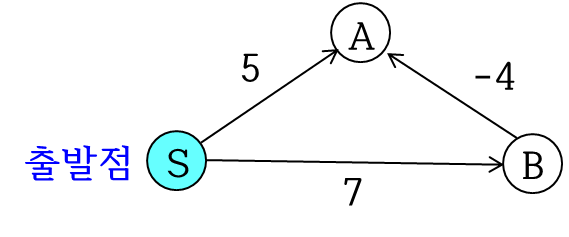
*   음수 가중치를 가진 그래프에서 최단 경로 찾기
*   그리디 알고리즘은 확정된 값에 대해 수정을 허락하지 않음 : 확정된 점에 대한 간선 완화 불가능



### 음수 사이클이 없는 그래프에서 간선 완화는 최대 몇 번 시도해야 할까?
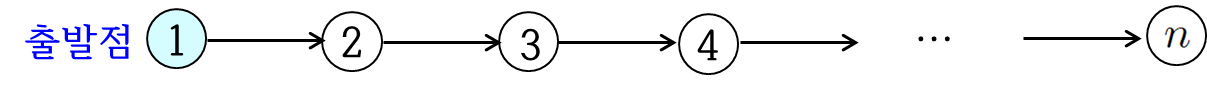
* 마지막 점이 간선 완화가 되어 출발점으로부터 최단 거리가 계산되려면 직전에 있는 점의 거리가 계산된 후에 가능.
* 또 그 전의 점도 마찬가지
* 따라서 출발점에서 시작하여 좌에서 우로 간선 완화를 단계적으로 수행하는 방식은 가장 긴 증가 순서를 찾는 과정과 유사함

### 선형 그래프에서 최단 경로를 찾는 방식을 일반 그래프에 적용
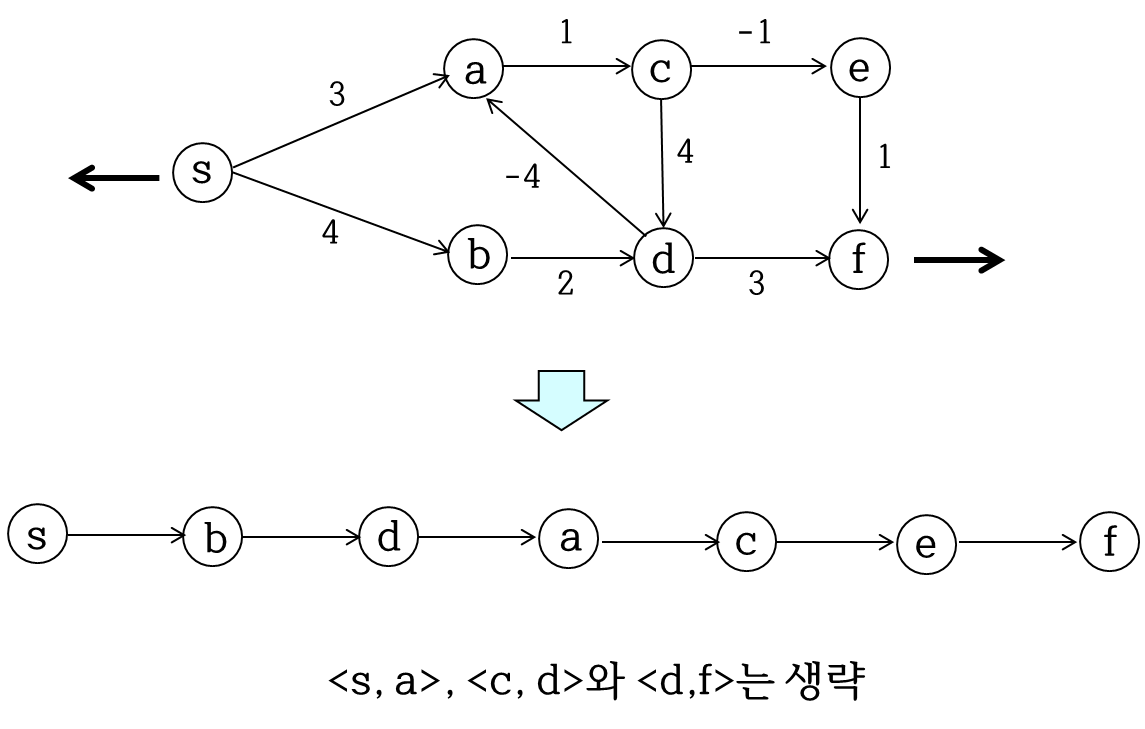

### 벨만-포드 최단 경로 알고리즘
* 정점을 0, 1, ..., n-1로 하여 알고리즘 종료 후에 D[i]가 출발점에서 마지막 점 i까지의 최단 거리를 갖는다.


1.   D를 ∞로 초기화한다. 단, D[s] = 0, s는 출발점
2.   다음을 n-1회 수행한다.

    각 간선 <i, j>에 대해 간선 완화를 다음과 같이 수행한다.
    ```
    if D[j] > (D[j] + 간선 <i, j>의 가중치):  
        D[j] = D[j] + 간선 <i, j>의 가중치  
        previous[j] = i  
    ```



#### 최단경로
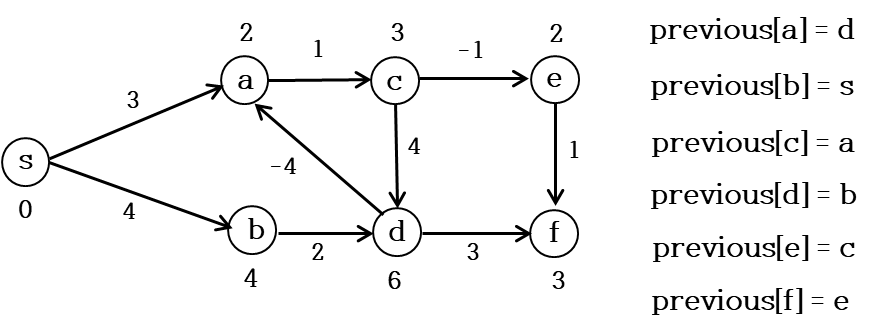

#### 음수 가중치가 미치는 단계적 영향
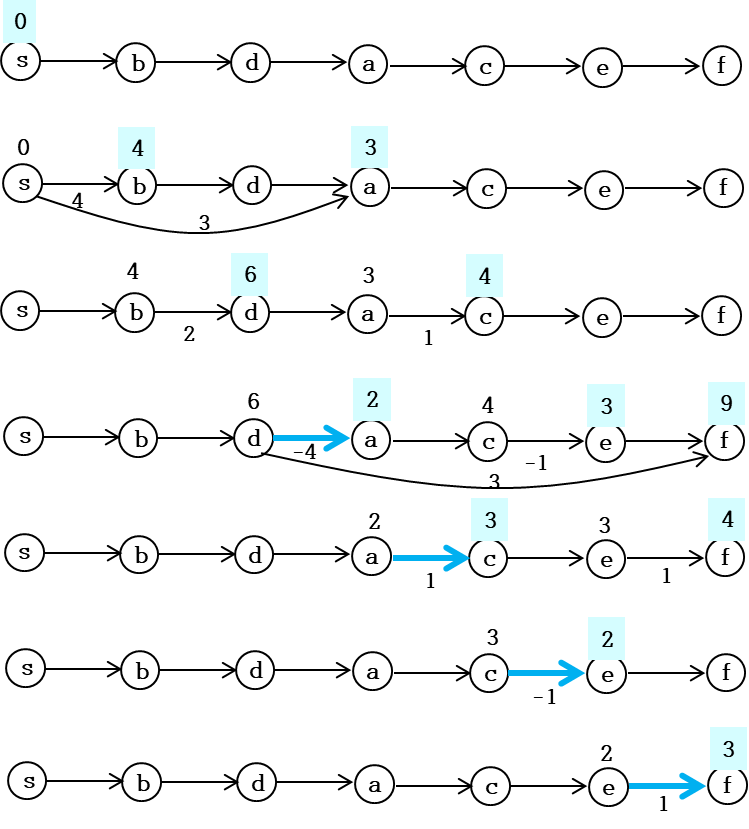

### 벨만-포드 알고리즘이 동적 계획 알고리즘인 이유

* 시작점 자체가 가장 작은 문제
* n-1개의 각 정점의 관점에서 작은 문제들을 살펴 전체 문제를 해결하는 방식을 보면   
경로상의 직전 점까지의 모든 해를 찾은 후 최단 거리가 결정되는데  
시작점에서 끝점까지의 간선 완화 결과가 전파되는 과정이 앞의 가장 긴 증가 순서의 그래프와 같은 방식이다.

In [16]:
#벨만-포드 알고리즘
INF = float('inf')
graph = [[INF,3,4,INF,INF,INF,INF],
         [INF,INF,INF,1,INF,INF,INF],
         [INF,INF,INF,INF,2,INF,INF],
         [INF,INF,INF,INF,4,-1,INF],
         [INF,-4,INF,INF,INF,INF,3],
         [INF,INF,INF,INF,INF,INF,1],
         [INF,INF,INF,INF,INF,INF,INF]]
n = len(graph)

s = 0
D = [INF for _ in range(n)]
D[s] = 0
previous =[-1  for _ in range(n)]
previous[s] = 0
for k in range(n-1):
    for i in range(n):
        for j in range(n):
            if graph[i][j] !=INF:
                if D[j] > D[i] + graph[i][j]:
                    D[j] = D[i] +graph[i][j]
                    previous[j] = i

#출력
print('정점 %1d으로부터의 최단 거리 '%s)
for i in range(n):
    print('[%d, %d] = %3d' %(s, i, D[i]))
print()
print('정점 0으로부터의 최단 경로')
for i in range(n):
    back = i
    print(back, end = '')
    while back != 0:
        print(' <-', previous[back], end='')
        back = previous[back]
    print()

정점 0으로부터의 최단 거리 
[0, 0] =   0
[0, 1] =   2
[0, 2] =   4
[0, 3] =   3
[0, 4] =   6
[0, 5] =   2
[0, 6] =   3

정점 0으로부터의 최단 경로
0
1 <- 4 <- 2 <- 0
2 <- 0
3 <- 1 <- 4 <- 2 <- 0
4 <- 2 <- 0
5 <- 3 <- 1 <- 4 <- 2 <- 0
6 <- 5 <- 3 <- 1 <- 4 <- 2 <- 0


### 수행시간

### 연습문제
* 타임머신 : https://www.acmicpc.net/problem/11657
* 최단경로 : https://codeup.kr/problem.php?id=3215 (다익스트라, 벨만-포드)